In [10]:
import os
wd = os.getcwd()
wd = os.path.dirname(os.path.dirname(wd))
import sys
sys.path.append(wd+"\\src\\")

In [11]:
from tube import InterpXY
from math import *
import numpy as np
from termodyn import DirectBallMany, get_optsmany_sample, get_dpsi_array
from powderlayer import PowderBD
import pprint as pp

In [12]:
from tqdm import tqdm_notebook
from matplotlib.patches import Polygon
import matplotlib as mpl
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed
import ipywidgets

%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 

mpl.rcParams['figure.figsize'] = (5,3) 

In [14]:
import json
from functional import seq

In [15]:
pdb = PowderBD()
pdb.all_powders_dict.keys()

dict_keys(['СФ 033', 'ВУ фл', 'ВТ', 'ВТМ', 'ВТХ-10', 'ВТХ-20', 'ВТД-25', '4\\1', '4\\1 фл', '4\\7', '4\\7 св', '4\\7 фл ВБП', '4\\7 ПТ-3 фл', '4\\7 Ц гр', '5\\1', '5\\1 х-10', '5\\1 х-20', '5\\1 д-20', '5\\1 д-25', '5\\7 св', '5\\7 н\\а', '5\\7 в\\а', '5\\7 Ц фл', '6\\7 гр', '6\\7 БП гр', '6\\7 фл В БП', '6\\7 П-5 БП фл', '6\\7 фл ', '7\\1', '7\\1 фл БП', '7\\7', '7\\14', '7\\1 УГ', '8\\1 тр', '8\\7', '8\\1 УГ', '9\\7', '9\\7 МН', '9\\7 БП', '11\\1 БП', '11\\7', '11\\1 УГ', '12\\1 Тр', '12\\1 тр БП', '12\\1 тр МН', '12\\7', '12\\7 В\\А', '12\\1 УГ', '14\\1 тр В\\А', '14\\7', '14\\7 В\\А', '14\\7 БП', '15\\1 тр В\\А', '15\\7', '16\\1 тр', '16\\1 тр В\\А', '17\\7', '18\\1 тр', '18\\1 тр БП', '22\\1 тр', '22\\7', '23\\7', '28\\1 тр', '37\\1 тр', 'НДТ-3 16\\1', 'НДТ-3 18\\1', 'НДТ-3 19\\1', 'НДТ-3 23\\1', 'НДТ-3 32\\1', 'НДТ-3 152\\57', 'ДГ-2 15\\1', 'ДГ-2 17\\1', 'ДГ-3 13\\1', 'ДГ-3 14\\1', 'ДГ-3 17\\1', 'ДГ-3 18\\1', 'ДГ-3 20\\1', 'ДГ-3 23\\1', 'ДГ-4 13\\1', '100\\56', '100\\70', '130\\5

### Нормальные пороха

In [16]:
good_powders = [
    'СФ 033', 'ВУ фл', 'ВТ', 'ВТМ', 'ВТХ-10', 'ВТХ-20', 'ВТД-25', '4\\1', '4\\1 фл', '4\\7', '4\\7 св', '4\\7 фл ВБП', 
    '4\\7 ПТ-3 фл', '4\\7 Ц гр', '5\\1', '5\\1 х-10', '5\\1 х-20', '5\\1 д-20', '5\\1 д-25', '5\\7 св', '5\\7 н\\а', 
    '5\\7 в\\а', '5\\7 Ц фл', '6\\7 гр', '6\\7 БП гр', '6\\7 фл В БП', '6\\7 П-5 БП фл', '6\\7 фл ', '7\\1', '7\\1 фл БП', 
    '7\\7', '7\\14', '7\\1 УГ', '8\\1 тр', '8\\7', '8\\1 УГ', '9\\7', '9\\7 МН', '9\\7 БП', '11\\1 БП', '11\\7', 
    '11\\1 УГ', '12\\1 Тр', '12\\1 тр БП', '12\\1 тр МН', '12\\7', '12\\7 В\\А', '12\\1 УГ', '14\\1 тр В\\А', '14\\7', 
    '14\\7 В\\А', '14\\7 БП', '15\\1 тр В\\А', '15\\7', '16\\1 тр', '16\\1 тр В\\А', '17\\7', '18\\1 тр', '18\\1 тр БП', 
    '22\\1 тр', '22\\7', '23\\7', '28\\1 тр', '37\\1 тр', 'НДТ-3 16\\1', 'НДТ-3 18\\1', 'НДТ-3 19\\1', 'НДТ-3 23\\1', 
    'НДТ-3 32\\1', 'НДТ-3 152\\57', 'ДГ-2 15\\1', 'ДГ-2 17\\1', 'ДГ-3 13\\1', 'ДГ-3 14\\1', 'ДГ-3 17\\1', 'ДГ-3 18\\1', 
    'ДГ-3 20\\1', 'ДГ-3 23\\1', 'ДГ-4 13\\1', '100\\56', '100\\70', '130\\50', '130\\58 БП', '152\\57', '152\\57 Ш', 
    '152\\57 БП', '180\\57', '180\\57 БП', '180\\57 Ш3 БП', '180\\60', 'НДТ-2 16\\1', 'НДТ-2 19\\1', 'НДТ-2 25\\1', 
    'НДТ-2 130\\50', 'НДТ-2 152\\57', 'ДГ-4 14\\1', 'ДГ-4 15\\1', ' АПЦ-235 П 16\\1', 
    'БНГ-1355 25\\1', 'МАП-1 23\\1', 'УГ-1', 'УГ-2', 'УГФ-1']

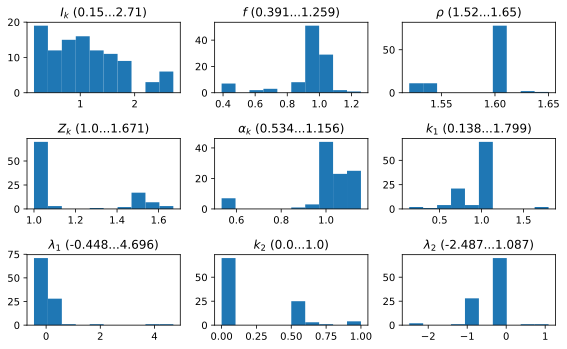

In [17]:
mpl.rcParams['figure.figsize'] = (8,5) 
def get_diap(name):
    res = seq(good_powders).map(lambda k: pdb[k][name]).to_list()
    res_min = min(res)
    res_max = max(res)
    return res, res_min, res_max

I_ks, I_ks_min, I_ks_max = get_diap('I_k')
plt.subplot(331)
plt.hist(I_ks)
plt.title(f'$I_k$ ({I_ks_min}...{I_ks_max})')

fs, fs_min, fs_max = get_diap('f')
plt.subplot(332)
plt.hist(fs)
plt.title(f'$f$ ({fs_min}...{fs_max})')

ros, ros_min, ros_max = get_diap('ro')
plt.subplot(333)
plt.hist(ros)
plt.title(f'$\\rho$ ({ros_min}...{ros_max})')

Z_ks, Z_ks_min, Z_ks_max = get_diap('Z_k')
plt.subplot(334)
plt.hist(Z_ks)
plt.title(f'$Z_k$ ({Z_ks_min}...{Z_ks_max})')

alpha_ks, alpha_ks_min, alpha_ks_max = get_diap('alpha_k')
plt.subplot(335)
plt.hist(alpha_ks)
plt.title(f'$\\alpha_k$ ({alpha_ks_min}...{alpha_ks_max})')

k_1s, k_1s_min, k_1s_max = get_diap('k_1')
plt.subplot(336)
plt.hist(k_1s)
plt.title(f'$k_1$ ({k_1s_min}...{k_1s_max})')

lambda_1s, lambda_1s_min, lambda_1s_max = get_diap('lambda_1')
plt.subplot(337)
plt.hist(lambda_1s)
plt.title(f'$\\lambda_1$ ({lambda_1s_min}...{lambda_1s_max})')

k_2s, k_2s_min, k_2s_max = get_diap('k_2')
plt.subplot(338)
plt.hist(k_2s)
plt.title(f'$k_2$ ({k_2s_min}...{k_2s_max})')

lambda_2s, lambda_2s_min, lambda_2s_max = get_diap('lambda_2')
plt.subplot(339)
plt.hist(lambda_2s)
plt.title(f'$\\lambda_2$ ({lambda_2s_min}...{lambda_2s_max})')

plt.tight_layout()
plt.show()

In [18]:
pdb[r'4\7']

{'name': '4\\7',
 'f': 1.027,
 'etta': 0.228,
 'alpha_k': 1.008,
 'T_1': 3006.0,
 'ro': 1.6,
 'I_k': 0.32,
 'Z_k': 1.488,
 'k_1': 0.811,
 'lambda_1': 0.081,
 'k_2': 0.505,
 'lambda_2': -1.024,
 'k_f': 0.0003,
 'k_l': 0.0016}

In [19]:
opts=get_optsmany_sample()
opts

{'powders': [{'omega': 13,
   'I_k': 0.32,
   'alpha_k': 1.008,
   'ro': 1.6,
   'f': 1.027,
   'etta': 0.228,
   'T_1': 3006.0,
   'zs': array([0.        , 0.00148949, 0.00297898, 0.00446847, 0.00595796,
          0.00744745, 0.00893694, 0.01042643, 0.01191592, 0.01340541,
          0.01489489, 0.01638438, 0.01787387, 0.01936336, 0.02085285,
          0.02234234, 0.02383183, 0.02532132, 0.02681081, 0.0283003 ,
          0.02978979, 0.03127928, 0.03276877, 0.03425826, 0.03574775,
          0.03723724, 0.03872673, 0.04021622, 0.04170571, 0.0431952 ,
          0.04468468, 0.04617417, 0.04766366, 0.04915315, 0.05064264,
          0.05213213, 0.05362162, 0.05511111, 0.0566006 , 0.05809009,
          0.05957958, 0.06106907, 0.06255856, 0.06404805, 0.06553754,
          0.06702703, 0.06851652, 0.07000601, 0.0714955 , 0.07298498,
          0.07447447, 0.07596396, 0.07745345, 0.07894294, 0.08043243,
          0.08192192, 0.08341141, 0.0849009 , 0.08639039, 0.08787988,
          0.08936937, 0.0

In [20]:
opts=get_optsmany_sample()
opts['init_cond']['p_f'] = 0
opts['init_cond']['q'] = 300
# opts['powders'][0]['omega'] = 10
# opts['powders'][1]['omega'] = 10
ball=DirectBallMany(opts)
def stop_foo(t,y):
    y = np.asarray(y)
    stop = np.alltrue(y[4::2]>=0.99)
    return stop or y[0] < ball.p0
ball.stop_foo = stop_foo
res=ball.run()

In [21]:
# %timeit ball.run()

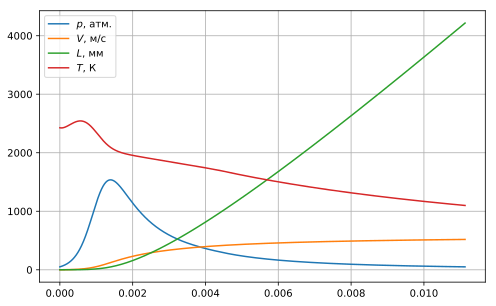

In [22]:
plt.plot(res[:,0], res[:,1]/1e5, label='$p$, атм.')
plt.plot(res[:,0], res[:,4], label='$V$, м/с')
plt.plot(res[:,0], res[:,2]*1000, label='$L$, мм')
# plt.plot(res[:,0], res[:,3]*1e9, label='$W$, $мм^3$')
plt.plot(res[:,0], [ball.set_k_and_stuff(r[1:])[1] for r in res], label='$T$, К')
plt.legend()
plt.grid(True)
plt.show()

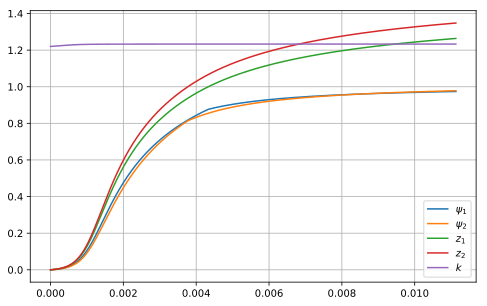

In [23]:
plt.plot(res[:,0], res[:,5], label='$\psi_1$')
plt.plot(res[:,0], res[:,7], label='$\psi_2$')
plt.plot(res[:,0], res[:,6], label='$z_1$')
plt.plot(res[:,0], res[:,8], label='$z_2$')
plt.plot(res[:,0], [ball.set_k_and_stuff(r[1:])[0] for r in res], label='$k$')
plt.legend()
plt.grid(True)
plt.show()

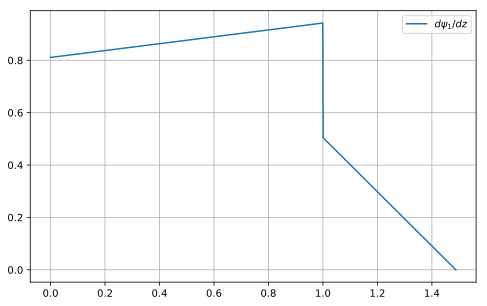

In [24]:
plt.plot(ball.opts['powders'][0]['zs'], ball.opts['powders'][0]['dpsi_dz'], label='$d\psi_1/dz$')

plt.legend()
plt.grid(True)
plt.show()

In [25]:
pdb[r'4\7']

{'name': '4\\7',
 'f': 1.027,
 'etta': 0.228,
 'alpha_k': 1.008,
 'T_1': 3006.0,
 'ro': 1.6,
 'I_k': 0.32,
 'Z_k': 1.488,
 'k_1': 0.811,
 'lambda_1': 0.081,
 'k_2': 0.505,
 'lambda_2': -1.024,
 'k_f': 0.0003,
 'k_l': 0.0016}

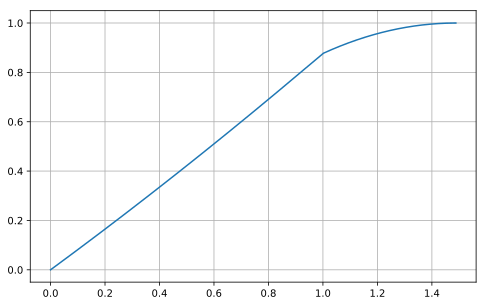

In [26]:
zs = np.linspace(0, pdb[r'4\7']['Z_k'], 10000)
dpsi = np.zeros_like(zs)
for i, z in enumerate(zs):
    if z < 1:
        dpsi[i] = z*(1+pdb[r'4\7']['lambda_1']*z)*pdb[r'4\7']['k_1']
    else:
        dpsi[i] = (z-1)*(1+pdb[r'4\7']['lambda_2']*(z-1))*pdb[r'4\7']['k_2'] + (1+pdb[r'4\7']['lambda_1'])*pdb[r'4\7']['k_1']
plt.plot(zs, dpsi)
plt.grid()
plt.show()

### Орево

In [33]:
pdb['4\\7']
# dpsidz, zs = get_dpsi_array(k1=p['k_1'], k2=p['k_2'], l1=p['lambda_1'], l2=p['lambda_2'], z_k=p['Z_k'], n=1000, norm_to_psi1=True)

{'name': '4\\7',
 'f': 1.027,
 'etta': 0.228,
 'alpha_k': 1.008,
 'T_1': 3006.0,
 'ro': 1.6,
 'I_k': 0.32,
 'Z_k': 1.488,
 'k_1': 0.811,
 'lambda_1': 0.081,
 'k_2': 0.505,
 'lambda_2': -1.024,
 'k_f': 0.0003,
 'k_l': 0.0016}

In [139]:
def get_opts(*tups, p_f=20e6, q=51.2):
    powders = []
    for name, omega in tups:
        p = pdb[name]
        dpsidz, zs = get_dpsi_array(k1=p['k_1'], k2=p['k_2'], l1=p['lambda_1'], l2=p['lambda_2'], z_k=p['Z_k'], n=1000, norm_to_psi1=True)
        powders.append({
            'omega': omega,      # масса навески пороха, г
            'I_k': p['I_k'],      # импульс конца горения МПа*с
            'alpha_k': p['alpha_k'], # коволюм
            'ro': p['ro'],        # плотность пороха г/см^3   
            'f': p['f'],       # сила пороха, МДж/кг
            'etta': p['etta'],    # k -1
            'T_1': p['T_1'],    # темп. горения ?
            'zs': zs,        # точки z для интерполяции dpsi_dz
            'dpsi_dz': dpsidz# точки dpsi_dz для интерполяции dpsi_dz
        })
    opts = {
    'powders': powders,
    'init_cond': {
        'd':23,           # калибр, мм      
        'K_zar': 1.08,    # коэфф, учитывающий доп работы
        'q': q,         # масса снаряда, г
        'W_kam': 41,   # объем каморы, см^3
        'sigma_T': 376,   # Постоянная коэффициента теплоотдачи, Дж*м/кг*К*с
        'T_stenki': 293,  # Температура стенки, К
        'p_f': p_f,      # Давление форсирования, Па

        'p0': 5e6,        # Давление вспышки, Па
        'k_vospl': 1.22,  # Коэффициент адиабаты газов воспламенителя
        'f_vospl': 0.26,  # Cила воспламенителя, МДж/кг
        'T_vospl': 2427   # Температура газов воспламенителя, К
    },
    'integr_cond': {
        'l_max': 1.150,   # длина ствола
        't_max': 0.5,     # на всякий пожарынй
        'dt': 6e-6        # шаг по времени
    }
    }
    return opts

In [140]:
opts = get_opts( ('СФ 033', 25), p_f=50e6)

In [141]:
ball=DirectBallMany(opts)
res = ball.run()

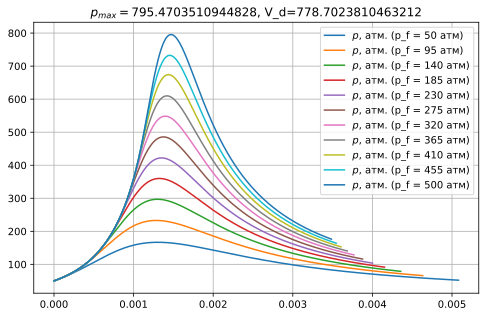

In [142]:
for pf in np.linspace(5e6, 50e6, 11):
    opts = get_opts( ('СФ 033', 25), p_f=pf)
    ball=DirectBallMany(opts)
    res = ball.run()
    plt.plot(res[:,0], res[:,1]/1e5, label=f'$p$, атм. (p_f = {pf*1e-5:.0f} атм)')
# plt.plot(res[:,0], res[:,1]/1e5, label='$p$, атм.')
# plt.plot(res[:,0], res[:,4], label='$V$, м/с')
# plt.plot(res[:,0], res[:,2]*1000, label='$L$, мм')
# plt.plot(res[:,0], res[:,3]*1e9, label='$W$, $мм^3$')
# plt.plot(res[:,0], [ball.set_k_and_stuff(r[1:])[1] for r in res], label='$T$, К')
plt.legend()
plt.grid(True)
plt.title('$p_{max} = $'+f'{np.max(res[:,1]/1e5)}, V_d={res[-1,4]}')
plt.show()

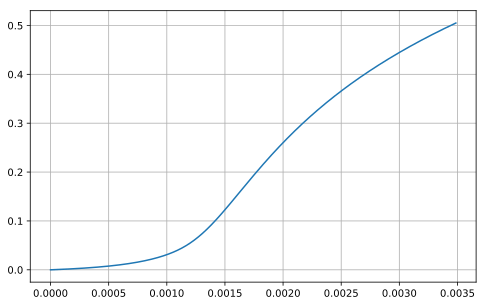

In [143]:
plt.plot(res[:,0], res[:,5], label='$\\psi$')
plt.grid()
plt.show()

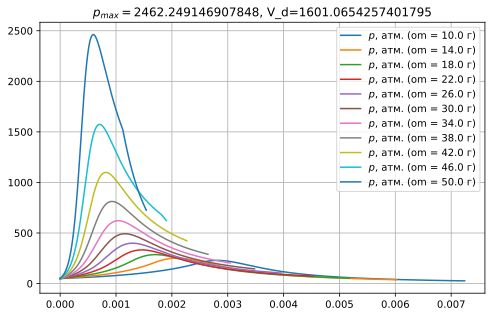

In [144]:
for om in np.linspace(10,50,11):
    opts = get_opts( ('СФ 033', om), p_f=20e6)
    ball=DirectBallMany(opts)
    res = ball.run()
    plt.plot(res[:,0], res[:,1]/1e5, label=f'$p$, атм. (om = {om} г)')
# plt.plot(res[:,0], res[:,1]/1e5, label='$p$, атм.')
# plt.plot(res[:,0], res[:,4], label='$V$, м/с')
# plt.plot(res[:,0], res[:,2]*1000, label='$L$, мм')
# plt.plot(res[:,0], res[:,3]*1e9, label='$W$, $мм^3$')
# plt.plot(res[:,0], [ball.set_k_and_stuff(r[1:])[1] for r in res], label='$T$, К')
plt.legend()
plt.grid(True)
plt.title('$p_{max} = $'+f'{np.max(res[:,1]/1e5)}, V_d={res[-1,4]}')
plt.show()